# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [12]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [13]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

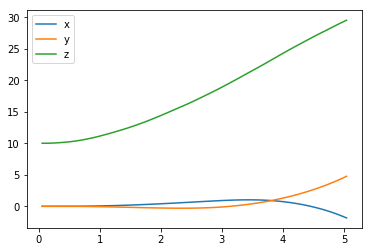

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

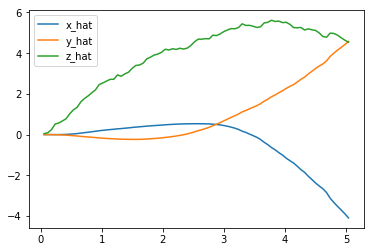

In [15]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

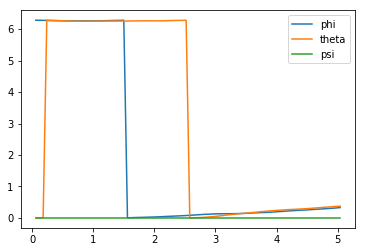

In [16]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

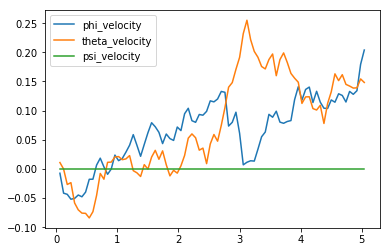

In [17]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

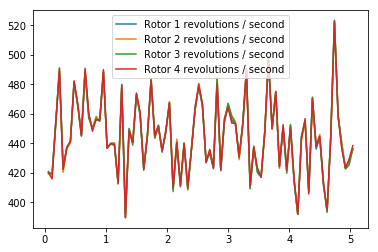

In [18]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [19]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -1.84344117   4.75675702  29.52219232   0.32917734   0.37514686   0.        ]
[-4.0931832   4.57570384  4.53771009]
[ 0.20396899  0.1483424   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [20]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.347 (best =  -0.072), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [22]:

%reload_ext autoreload
%autoreload 2

## TODO: Train your agent here.
# takeoff reward function penalty 0.1 vs 0.001 previously
import sys
import pandas as pd
from agents.agent import Agent
from takeoff import Task # specify task file here 

num_episodes = 1000
best_score = -100
# worst_score = 100
# define initial and target positions for takeoff; initialized at None in Task class
# init_pos = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = Agent(task) 

rewards = []
stats = {}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        best_score = max(best_score, score)
#         worst_score = min(worst_score, score)
             
        if done:
            print("\r{:4d}. score: {:8.3f} best: {:8.3f} pos: ({:8.2f},{:8.2f},{:8.2f})".format(
                i_episode, 
                score, 
                best_score, 
#                 worst_score,
                task.sim.pose[0],
                task.sim.pose[1],
                task.sim.pose[2]))  # [debug]

            break

    rewards.append(score)
    stats[i_episode] = {'Episode': i_episode, 'Reward':score,'Action':action,
                        'Position':(task.sim.pose[0],task.sim.pose[1],task.sim.pose[2])}
    sys.stdout.flush()

   1. score:  168.762 best:  168.762 pos: (    8.85,  -26.63,    0.00)
   2. score:  115.402 best:  168.762 pos: (   20.90,    9.40,    0.00)
   3. score:  119.880 best:  168.762 pos: (  -21.46,   -5.75,    0.00)
   4. score:  184.500 best:  184.500 pos: (  -35.77,  132.99,   36.66)
   5. score:  185.739 best:  185.739 pos: (   51.69,  -96.24,   28.28)
   6. score:  111.006 best:  185.739 pos: (  150.00,  -32.82,  135.02)
   7. score:   99.728 best:  185.739 pos: (  150.00,  -77.00,   93.57)
   8. score:   95.272 best:  185.739 pos: (   86.03,  -32.67,    0.00)
   9. score:   99.815 best:  185.739 pos: (  150.00,  -32.58,  125.15)
  10. score:  104.447 best:  185.739 pos: (  150.00,  -17.26,   65.65)
  11. score:  128.423 best:  185.739 pos: (  150.00,  -86.49,   43.84)
  12. score:  184.827 best:  185.739 pos: (  150.00,  -59.68,    0.00)
  13. score:  163.920 best:  185.739 pos: (    1.24,  -86.06,    0.00)
  14. score:  185.916 best:  185.916 pos: (  -96.97,  -29.18,   90.24)
  15. 

 117. score:  189.269 best:  189.269 pos: (   -9.95,   -3.42,  142.47)
 118. score:  188.490 best:  189.269 pos: (  -58.18,  -29.31,  115.03)
 119. score:  188.592 best:  189.269 pos: (  -59.85,  -16.77,  117.07)
 120. score:  188.814 best:  189.269 pos: (  -75.24,    1.20,   96.74)
 121. score:  188.635 best:  189.269 pos: (  -47.11,  -26.11,  123.82)
 122. score:  188.533 best:  189.269 pos: (  -54.58,   20.76,  133.27)
 123. score:  188.999 best:  189.269 pos: (  -48.83,   -7.12,  124.68)
 124. score:  188.458 best:  189.269 pos: (  -58.14,  -34.25,  112.21)
 125. score:  189.141 best:  189.269 pos: (  -18.10,  -16.12,  135.94)
 126. score:  188.940 best:  189.269 pos: (  -44.15,    6.29,  128.49)
 127. score:  188.819 best:  189.269 pos: (  -43.85,   -4.25,  134.92)
 128. score:  188.916 best:  189.269 pos: (  -33.11,  -22.42,  132.89)
 129. score:  188.727 best:  189.269 pos: (   14.19,  -68.57,  107.95)
 130. score:  188.159 best:  189.269 pos: (  -70.06,   34.00,  180.75)
 131. 

 233. score:  189.156 best:  189.593 pos: (  -40.04,   -6.15,  139.05)
 234. score:  188.981 best:  189.593 pos: (   -5.26,  -46.34,  128.74)
 235. score:  188.914 best:  189.593 pos: (   32.39,   16.94,  161.75)
 236. score:  161.064 best:  189.593 pos: (  -32.02,  150.00,  300.00)
 237. score:  188.806 best:  189.593 pos: (  -53.93,  -13.33,  123.96)
 238. score:  188.915 best:  189.593 pos: (  -37.94,  -24.68,  127.46)
 239. score:  189.170 best:  189.593 pos: (   24.87,    6.47,  139.80)
 240. score:  189.322 best:  189.593 pos: (   17.90,   -5.53,  150.21)
 241. score:  189.227 best:  189.593 pos: (   10.85,  -15.10,  140.54)
 242. score:  189.142 best:  189.593 pos: (   18.10,    7.07,  166.10)
 243. score:  188.943 best:  189.593 pos: (  -23.40,   23.74,  143.27)
 244. score:  189.085 best:  189.593 pos: (   -0.23,  -46.69,  126.48)
 245. score:  189.239 best:  189.593 pos: (    0.42,  -31.82,  132.97)
 246. score:  188.858 best:  189.593 pos: (  -28.05,   23.29,  163.34)
 247. 

 349. score:  189.021 best:  189.593 pos: (   23.18,  -32.80,  130.69)
 350. score:  188.676 best:  189.593 pos: (  -27.89,   32.02,  171.40)
 351. score:  189.138 best:  189.593 pos: (  -34.94,  -11.54,  130.11)
 352. score:  188.990 best:  189.593 pos: (  -25.87,  -34.31,  128.57)
 353. score:  189.120 best:  189.593 pos: (  -20.88,   22.12,  139.15)
 354. score:  189.022 best:  189.593 pos: (    9.09,  -39.89,  131.07)
 355. score:  189.113 best:  189.593 pos: (  -19.31,  -26.76,  133.45)
 356. score:  189.325 best:  189.593 pos: (   20.18,   -3.03,  137.29)
 357. score:  189.148 best:  189.593 pos: (  -34.04,  -12.85,  130.63)
 358. score:  189.318 best:  189.593 pos: (   21.29,   -3.46,  137.24)
 359. score:  188.603 best:  189.593 pos: (  -33.91,  -57.45,  113.14)
 360. score:  189.534 best:  189.593 pos: (    5.32,   -0.61,  138.67)
 361. score:  189.374 best:  189.593 pos: (  -12.17,   10.10,  138.38)
 362. score:  189.279 best:  189.593 pos: (    7.43,   17.32,  141.76)
 363. 

 465. score:  188.986 best:  189.603 pos: (  -19.15,  -40.15,  127.93)
 466. score:  189.196 best:  189.603 pos: (   13.45,   21.53,  147.74)
 467. score:  189.232 best:  189.603 pos: (  -17.72,   16.22,  136.08)
 468. score:  189.326 best:  189.603 pos: (   19.22,   -9.43,  144.25)
 469. score:  189.206 best:  189.603 pos: (   16.27,  -21.81,  135.67)
 470. score:  189.021 best:  189.603 pos: (   18.00,   25.03,  143.31)
 471. score:  188.865 best:  189.603 pos: (   21.84,   31.85,  153.88)
 472. score:  189.308 best:  189.603 pos: (  -27.95,   -1.82,  134.32)
 473. score:  189.162 best:  189.603 pos: (  -34.58,   -4.04,  139.15)
 474. score:  188.782 best:  189.603 pos: (   -2.73,   46.58,  240.64)
 475. score:  189.177 best:  189.603 pos: (   -6.96,   21.67,  140.99)
 476. score:  188.949 best:  189.603 pos: (   25.17,   19.51,  186.11)
 477. score:  189.258 best:  189.603 pos: (   -9.56,   17.68,  145.16)
 478. score:  189.141 best:  189.603 pos: (   20.28,   18.23,  142.98)
 479. 

 581. score:  187.760 best:  189.606 pos: (  150.00,  150.00,  300.00)
 582. score:  188.721 best:  189.606 pos: (   40.77,  -13.05,  168.78)
 583. score:  189.459 best:  189.606 pos: (   10.07,  -12.02,  140.88)
 584. score:  189.013 best:  189.606 pos: (   36.03,    3.88,  156.59)
 585. score:  189.215 best:  189.606 pos: (  -17.27,   19.12,  140.52)
 586. score:  188.888 best:  189.606 pos: (   38.83,   12.57,  137.50)
 587. score:  189.110 best:  189.606 pos: (  -11.85,   25.63,  137.17)
 588. score:  189.053 best:  189.606 pos: (  -30.77,    8.62,  133.47)
 589. score:  189.504 best:  189.606 pos: (    4.42,   -8.57,  137.81)
 590. score:  189.492 best:  189.606 pos: (    4.92,   -7.68,  137.80)
 591. score:  189.423 best:  189.606 pos: (    3.61,    1.74,  140.28)
 592. score:  189.458 best:  189.606 pos: (  -13.07,   -6.51,  137.60)
 593. score:  189.427 best:  189.606 pos: (   -1.77,   16.95,  137.63)
 594. score:  189.391 best:  189.606 pos: (   -8.73,   13.27,  137.58)
 595. 

 697. score:  189.385 best:  189.606 pos: (  -16.50,    8.22,  137.24)
 698. score:  189.022 best:  189.606 pos: (   28.77,  -22.84,  135.61)
 699. score:  188.895 best:  189.606 pos: (  -36.28,  -30.55,  125.82)
 700. score:  189.400 best:  189.606 pos: (    1.53,   16.43,  144.58)
 701. score:  189.317 best:  189.606 pos: (  -15.81,   -2.08,  138.02)
 702. score:  188.858 best:  189.606 pos: (  -30.55,   12.78,  181.34)
 703. score:  188.698 best:  189.606 pos: (    1.66,  -76.34,  101.60)
 704. score:  189.044 best:  189.606 pos: (   -5.84,   32.48,  154.02)
 705. score:  189.160 best:  189.606 pos: (  -29.24,  -12.67,  133.21)
 706. score:  189.598 best:  189.606 pos: (    2.72,    0.33,  138.48)
 707. score:  189.291 best:  189.606 pos: (  -16.26,  -22.77,  134.22)
 708. score:  189.102 best:  189.606 pos: (  -24.04,  -19.35,  133.46)
 709. score:  189.367 best:  189.606 pos: (   -7.12,   12.40,  137.30)
 710. score:  189.043 best:  189.606 pos: (  -18.20,  -37.71,  129.42)
 711. 

 813. score:  189.178 best:  189.606 pos: (    3.49,  -37.85,  130.45)
 814. score:  189.178 best:  189.606 pos: (   20.85,  -14.05,  136.58)
 815. score:  188.805 best:  189.606 pos: (  -21.28,  -61.48,  107.42)
 816. score:  188.839 best:  189.606 pos: (   -8.49,   29.68,  216.89)
 817. score:  189.374 best:  189.606 pos: (   -6.05,   16.36,  137.88)
 818. score:  187.912 best:  189.606 pos: (   27.19,  -83.56,   76.82)
 819. score:  189.481 best:  189.606 pos: (    7.87,   -8.03,  138.04)
 820. score:  189.213 best:  189.606 pos: (   24.57,   -4.45,  151.22)
 821. score:  189.386 best:  189.606 pos: (    9.67,  -12.40,  137.39)
 822. score:  188.108 best:  189.606 pos: (   90.05,   33.64,  236.24)
 823. score:  189.312 best:  189.606 pos: (   22.81,    2.14,  136.71)
 824. score:  188.855 best:  189.606 pos: (  -21.66,   19.77,  155.52)
 825. score:  189.120 best:  189.606 pos: (   24.59,    2.44,  177.89)
 826. score:  189.175 best:  189.606 pos: (  -29.76,   -8.86,  133.36)
 827. 

 929. score:  189.374 best:  189.606 pos: (   14.59,    1.60,  137.91)
 930. score:  179.481 best:  189.606 pos: (  -31.95,   39.58,  300.00)
 931. score:  189.077 best:  189.606 pos: (   -2.55,  -45.37,  127.72)
 932. score:  189.008 best:  189.606 pos: (   30.37,   17.68,  151.11)
 933. score:  188.338 best:  189.606 pos: (  -43.80,  -60.83,  105.95)
 934. score:  188.804 best:  189.606 pos: (  -56.53,    8.98,  121.94)
 935. score:  188.956 best:  189.606 pos: (  -38.48,   14.98,  129.58)
 936. score:  189.448 best:  189.606 pos: (    0.32,   -8.55,  138.44)
 937. score:  188.731 best:  189.606 pos: (   39.83,  -41.58,  131.26)
 938. score:  189.476 best:  189.606 pos: (    1.99,    1.88,  138.92)
 939. score:  189.167 best:  189.606 pos: (  -21.19,   18.72,  143.01)
 940. score:  189.200 best:  189.606 pos: (   23.10,   -7.25,  146.81)
 941. score:  189.062 best:  189.606 pos: (   14.97,  -27.77,  136.11)
 942. score:  167.915 best:  189.606 pos: (   28.98,  150.00,  300.00)
 943. 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

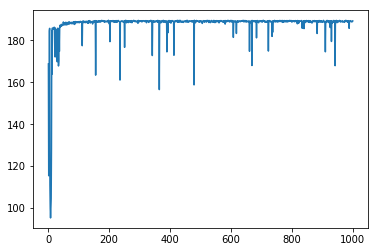

In [56]:
stats[3]["Reward"]
x = []
y = []
for key, value in stats.items():
    x.append(key)
    y.append(value["Reward"])
    
plt.plot(x, y)
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I selected the takeoff task to be learn by the agent. The initial reward function provided by the sample task.py had some problems, because it had a high variance caused by the unbounded function. Because of that, the agent wasn't able to learn at all. So I decided to choose the tangens hyperbolicus function because it is bounded(RealNumbers->[0,1]). With some scaling for the tanh function that fixed the problem. The difference between the pose and target position was fine so I didn't need to change anything. My final reward function is: reward = np.tanh(1 - 0.0005*(abs(self.sim.pose[:3] - self.target_pos)).sum())

It could maybe be improved with some other scaling factor for the difference between pose and target pose, but I think this solution is fine.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used DDGP with the same architecture that you've provided in the classroom. The actor Neurol Net consists of two FC layers with 400 and 300 Nodes, l2 kernel regularizer of 0.01, batch-norm and the Adam Optimizer with a learning rate of 0.0001. 
The critic NN consists of two 400 Node and 300 Node layers, again with l2 kernel regularizer of 0.01, and the relu activation function.

I choose the discount rate to be 0.99 to give to give the agent a minimal preference for rewards earned in the past and rewards earned in the future.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

In my opinion the task was quite easy to learn for the agent. It took me multiple runs with the same architecture and only minimal changes to get to this result. The huge problem for me was the big amount of time it needed to train, thats why I am only running 1000 episodes(I think the agent could better with more episodes). It suprised me that the agent in the run provided you in this notebook started off with a high reward and was very quickle able to hold it at that level. The best performance of this agent was stable after around 500 - 600 runs at the mean reward was ~188 in the end. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

For me the hardest part was to getting started. This project required much more code than the other projects. But the samples provided in the classroom really helped me out. Another hard part was the time the training needed. I don't really know why in this project there is no GPU support provided. This would helped me and I think others out very much, because I could've tried out much more. 
Like I mentioned above I did run the same settings multiple times and at this run provided, the agent seemed to get a high reward very fast and he was able to hold it. That really suprised me. Maybe the scaling factor for the reward function was to high. Any further advices would be appreciated :).